<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'>
<ul>We are using the same dataset as the previous laboratory exercise, now you need to build Neural networks</ul>

<li>Build three different networks with using:</li>
different layers, activation functions, neurans per layers, number of layers
<li>train your network and set the optimal number of epochs and batch size</li>
<li>Evaluate the three networks on the same test dataset</li>
<li>Compare the results</li>
</ul>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







 NEURAL NETWORKS 

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data Science/lab/lab3/train.csv')
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
data.drop(['BHK_OR_RK'], axis=1,inplace=True)

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
#ORDINAL ENCODER [POSTED_BY and ADRESS]
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()
encoder.fit(data.iloc[:,[0,7]])
data.iloc[:,[0,7]] = encoder.transform(data.iloc[:,[0,7]])

In [ ]:
import numpy as np


X=np.asarray(data.drop('TARGET(PRICE_IN_LACS)',axis=1))
Y=np.asarray(data['TARGET(PRICE_IN_LACS)'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 6.6150000e+03,
        2.4690280e+01, 7.8418890e+01],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 8.7100000e+02,
        1.3054202e+01, 7.7674002e+01],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0340000e+03,
        2.4690280e+01, 7.8418890e+01],
       ...,
       [2.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.4280000e+03,
        2.2288976e+01, 7.3128222e+01],
       [2.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 5.4510000e+03,
        2.8567633e+01, 7.7383124e+01],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 5.1860000e+03,
        2.8429614e+01, 7.7481711e+01]])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#   Regression Model
#  Define Keras Model
# First
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(Dense(16, input_dim=10, activation='relu'))

model.add(Dropout(0.2, input_shape=(16,)))

model.add(Dense(8, activation='relu'))

model.add(Dropout(0.2, input_shape=(8,)))

model.add(Dense(1, activation='linear'))

In [ ]:
# Compile Keras Model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
X_train.shape

(23560, 10)

In [ ]:
Y_train.shape

(23560,)

In [ ]:
# Fit Keras Model
history = model.fit(X_train, Y_train, epochs=20, batch_size=100,  verbose=1, validation_split=0.2)

Epoch 1/20
189/189 [==============================] - 1s 3ms/step - loss: 461844.3750 - val_loss: 377160.5000
Epoch 2/20
189/189 [==============================] - 1s 3ms/step - loss: 460665.1562 - val_loss: 375006.5000
Epoch 3/20
189/189 [==============================] - 1s 3ms/step - loss: 457188.2812 - val_loss: 370536.1250
Epoch 4/20
189/189 [==============================] - 1s 4ms/step - loss: 450315.2188 - val_loss: 363634.1562
Epoch 5/20
189/189 [==============================] - 1s 5ms/step - loss: 442197.2500 - val_loss: 355399.1875
Epoch 6/20
189/189 [==============================] - 1s 5ms/step - loss: 432518.6250 - val_loss: 347002.1562
Epoch 7/20
189/189 [==============================] - 1s 5ms/step - loss: 426009.9375 - val_loss: 341864.4062
Epoch 8/20
189/189 [==============================] - 1s 4ms/step - loss: 419243.9375 - val_loss: 338292.3125
Epoch 9/20
189/189 [==============================] - 1s 4ms/step - loss: 419247.6250 - val_loss: 336403.4688
Epoch 10/2

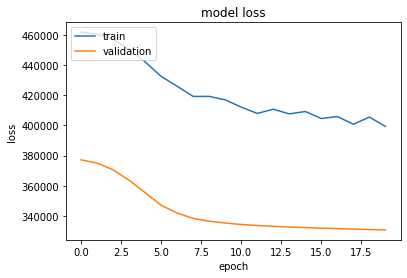

In [ ]:
#  Evaluate Keras Model
# "Loss"
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.round(1)
y_pred

185/185 [==============================] - 1s 3ms/step


array([[272.5],
       [ 28.9],
       [ 44.7],
       ...,
       [ 76.3],
       [ 10.3],
       [115.6]], dtype=float32)

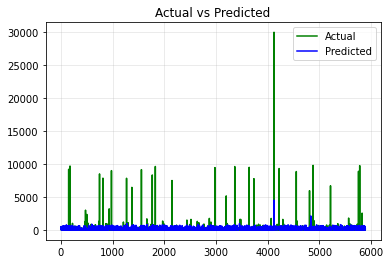

In [ ]:
#Visualising the Acutal and predicted Result
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.13221704792507605


In [ ]:
#Second 

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data Science/lab/lab3/train.csv')
data.head()

data.drop(['BHK_OR_RK'], axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

#ORDINAL ENCODER [POSTED_BY and ADRESS]
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(data.iloc[:,[0,7]])
data.iloc[:,[0,7]] = encoder.transform(data.iloc[:,[0,7]])


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]],  data['TARGET(PRICE_IN_LACS)'], test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(23560, 10) (5891, 10) (23560,) (5891,)


In [ ]:
model = Sequential()

model.add(Dense(216, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(512,kernel_initializer = 'normal', activation='relu'))
model.add(Dense(512,kernel_initializer = 'normal', activation='relu'))
model.add(Dense(512,kernel_initializer = 'normal', activation='relu'))

model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 216)               2376      
                                                                 
 dense_4 (Dense)             (None, 512)               111104    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 639,305
Trainable params: 639,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape

(23560, 10)

In [ ]:
model.compile(loss='mae', optimizer='adam')

In [ ]:
# Fit Keras Model
history = model.fit(X_train, Y_train, epochs=30, batch_size=250,  verbose=1, validation_split=0.2)

Epoch 1/30
76/76 [==============================] - 3s 28ms/step - loss: 378.6604 - val_loss: 584.7048
Epoch 2/30
76/76 [==============================] - 2s 26ms/step - loss: 856.3627 - val_loss: 374.4022
Epoch 3/30
76/76 [==============================] - 2s 25ms/step - loss: 1010.8311 - val_loss: 101.7570
Epoch 4/30
76/76 [==============================] - 2s 25ms/step - loss: 754.3484 - val_loss: 519.8818
Epoch 5/30
76/76 [==============================] - 2s 26ms/step - loss: 289.5666 - val_loss: 1224.9208
Epoch 6/30
76/76 [==============================] - 2s 26ms/step - loss: 206.3989 - val_loss: 3092.1267
Epoch 7/30
76/76 [==============================] - 2s 25ms/step - loss: 852.9161 - val_loss: 1132.1996
Epoch 8/30
76/76 [==============================] - 2s 25ms/step - loss: 1087.3397 - val_loss: 2102.5862
Epoch 9/30
76/76 [==============================] - 2s 25ms/step - loss: 912.7937 - val_loss: 2094.5774
Epoch 10/30
76/76 [==============================] - 2s 25ms/step 

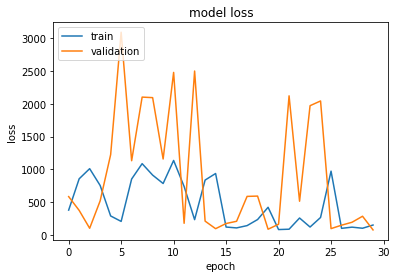

In [ ]:
#Evaluate Keras Model
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

185/185 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.2965648586737496


In [ ]:
y_pred
Y_test

11553     120.0
16097      75.0
23217      27.0
16466    7020.0
12081     140.0
          ...  
27119     390.0
17668      58.0
9046      260.0
24983      24.0
2946       23.0
Name: TARGET(PRICE_IN_LACS), Length: 5891, dtype: float64

In [ ]:
##Third

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data Science/lab/lab3/train.csv')
data.head()

data.drop(['BHK_OR_RK'], axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

#ORDINAL ENCODER [POSTED_BY and ADRESS]
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(data.iloc[:,[0,7]])
data.iloc[:,[0,7]] = encoder.transform(data.iloc[:,[0,7]])


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]],  data['TARGET(PRICE_IN_LACS)'], test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(23560, 10) (5891, 10) (23560,) (5891,)


In [ ]:
model = Sequential()

model.add(Dense(216, input_dim=10, kernel_initializer='normal', activation='tanh'))
model.add(Dense(512,kernel_initializer = 'normal', activation='tanh'))
model.add(Dense(512,kernel_initializer = 'normal', activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 216)               2376      
                                                                 
 dense_32 (Dense)            (None, 512)               111104    
                                                                 
 dense_33 (Dense)            (None, 512)               262656    
                                                                 
 dense_34 (Dense)            (None, 1)                 513       
                                                                 
Total params: 376,649
Trainable params: 376,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape

(23560, 10)

In [ ]:
model.compile(loss='mae', optimizer='adam')

In [ ]:
# Fit Keras Model
history = model.fit(X_train, Y_train, epochs=30, batch_size=150,  verbose=1, validation_split=0.2)

Epoch 1/30
126/126 [==============================] - 4s 21ms/step - loss: 110.3520 - val_loss: 95.4035
Epoch 2/30
126/126 [==============================] - 2s 13ms/step - loss: 106.9764 - val_loss: 95.4058
Epoch 3/30
126/126 [==============================] - 2s 13ms/step - loss: 106.8825 - val_loss: 95.1151
Epoch 4/30
126/126 [==============================] - 2s 13ms/step - loss: 104.2019 - val_loss: 91.4139
Epoch 5/30
126/126 [==============================] - 2s 13ms/step - loss: 101.7155 - val_loss: 87.9647
Epoch 6/30
126/126 [==============================] - 2s 13ms/step - loss: 99.8598 - val_loss: 87.4715
Epoch 7/30
126/126 [==============================] - 2s 13ms/step - loss: 99.3966 - val_loss: 87.6042
Epoch 8/30
126/126 [==============================] - 2s 13ms/step - loss: 99.0993 - val_loss: 86.7194
Epoch 9/30
126/126 [==============================] - 2s 13ms/step - loss: 98.5919 - val_loss: 86.4233
Epoch 10/30
126/126 [==============================] - 2s 13ms/step 

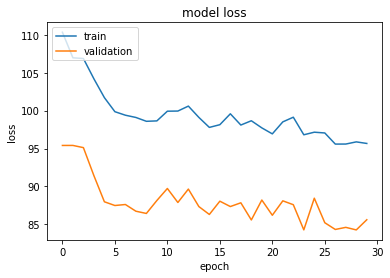

In [ ]:
#Evaluate Keras Model
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

185/185 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.03641875950035567


In [ ]:
y_pred
Y_test

11553     120.0
16097      75.0
23217      27.0
16466    7020.0
12081     140.0
          ...  
27119     390.0
17668      58.0
9046      260.0
24983      24.0
2946       23.0
Name: TARGET(PRICE_IN_LACS), Length: 5891, dtype: float64

First model   r_square score:  0.13221704792507605


Second model  r_square score: 0.2965648586737496


Third model   r_square score: 0.03641875950035567

**Conclusion**: The second model with relu activation function gives the best reuslts